In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('computer_prices_all.csv')
df

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Laptop,ASUS,ASUS Pro ZWL,2023,Windows,Mainstream,Intel,Intel i7-13721,4,12,...,1920x1080,144,90,180,0,Wi-Fi 6,5.1,1.87,24,1712.99
99996,Laptop,Lenovo,Lenovo Stealth 014,2018,Windows,Ultrabook,AMD,AMD Ryzen 5 5117,2,8,...,2560x1600,90,50,65,0,Wi-Fi 6,5.1,1.37,12,1258.99
99997,Laptop,ASUS,ASUS Zen LKD,2020,Windows,Mainstream,Intel,Intel i5-12677,2,6,...,2560x1600,120,99,180,0,Wi-Fi 6,4.2,1.17,12,1686.99
99998,Laptop,ASUS,ASUS Blade DH6,2020,Windows,Mainstream,AMD,AMD Ryzen 7 4590,4,12,...,2560x1600,120,60,90,0,Wi-Fi 6,5.3,1.70,24,2164.99


In [42]:
df=df.drop(['model','release_year','release_year','cpu_model','resolution'
            ,'battery_wh','refresh_hz','wifi','bluetooth','weight_kg'
            ,'form_factor','cpu_threads','cpu_boost_ghz','display_type'
            ,'display_size_in','charger_watts','psu_watts','gpu_model','cpu_base_ghz'],axis=1)
df

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
0,Desktop,Samsung,Windows,Intel,3,12,NVIDIA,2,6,16,NVMe,1024,1,36,1383.99
1,Laptop,Samsung,Windows,Intel,4,12,NVIDIA,4,10,64,NVMe,512,1,12,2274.99
2,Desktop,Lenovo,macOS,AMD,2,8,NVIDIA,1,4,8,NVMe,512,2,24,1879.99
3,Desktop,Dell,Windows,AMD,2,6,AMD,2,6,16,HDD,512,2,36,1331.99
4,Laptop,Gigabyte,Linux,AMD,5,16,NVIDIA,5,12,96,NVMe,256,1,12,2681.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Laptop,ASUS,Windows,Intel,4,12,AMD,3,8,32,HDD,2048,1,24,1712.99
99996,Laptop,Lenovo,Windows,AMD,2,8,AMD,1,4,8,HDD,1024,1,12,1258.99
99997,Laptop,ASUS,Windows,Intel,2,6,NVIDIA,2,6,16,NVMe,1024,1,12,1686.99
99998,Laptop,ASUS,Windows,AMD,4,12,NVIDIA,3,8,32,NVMe,256,1,24,2164.99


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   os                   100000 non-null  object 
 3   cpu_brand            100000 non-null  object 
 4   cpu_tier             100000 non-null  int64  
 5   cpu_cores            100000 non-null  int64  
 6   gpu_brand            100000 non-null  object 
 7   gpu_tier             100000 non-null  int64  
 8   vram_gb              100000 non-null  int64  
 9   ram_gb               100000 non-null  int64  
 10  storage_type         100000 non-null  object 
 11  storage_gb           100000 non-null  int64  
 12  storage_drive_count  100000 non-null  int64  
 13  warranty_months      100000 non-null  int64  
 14  price                100000 non-null  float64
dtypes: float64(1), int

In [44]:
df.drop_duplicates()

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
0,Desktop,Samsung,Windows,Intel,3,12,NVIDIA,2,6,16,NVMe,1024,1,36,1383.99
1,Laptop,Samsung,Windows,Intel,4,12,NVIDIA,4,10,64,NVMe,512,1,12,2274.99
2,Desktop,Lenovo,macOS,AMD,2,8,NVIDIA,1,4,8,NVMe,512,2,24,1879.99
3,Desktop,Dell,Windows,AMD,2,6,AMD,2,6,16,HDD,512,2,36,1331.99
4,Laptop,Gigabyte,Linux,AMD,5,16,NVIDIA,5,12,96,NVMe,256,1,12,2681.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Laptop,ASUS,Windows,Intel,4,12,AMD,3,8,32,HDD,2048,1,24,1712.99
99996,Laptop,Lenovo,Windows,AMD,2,8,AMD,1,4,8,HDD,1024,1,12,1258.99
99997,Laptop,ASUS,Windows,Intel,2,6,NVIDIA,2,6,16,NVMe,1024,1,12,1686.99
99998,Laptop,ASUS,Windows,AMD,4,12,NVIDIA,3,8,32,NVMe,256,1,24,2164.99


In [45]:
unique_value=df['device_type'].unique()
unique_value

array(['Desktop', 'Laptop'], dtype=object)

In [46]:
Desktop=df[df.device_type=='Desktop']
Desktop

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
0,Desktop,Samsung,Windows,Intel,3,12,NVIDIA,2,6,16,NVMe,1024,1,36,1383.99
2,Desktop,Lenovo,macOS,AMD,2,8,NVIDIA,1,4,8,NVMe,512,2,24,1879.99
3,Desktop,Dell,Windows,AMD,2,6,AMD,2,6,16,HDD,512,2,36,1331.99
5,Desktop,MSI,Windows,Intel,5,16,NVIDIA,6,16,96,NVMe,512,2,36,2751.99
6,Desktop,Apple,Windows,Apple,2,6,Apple,1,0,8,Hybrid,2048,2,24,1609.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,Desktop,Apple,Windows,Apple,4,12,Apple,3,4,32,NVMe,1024,2,24,2121.99
99991,Desktop,Lenovo,Windows,AMD,3,12,NVIDIA,3,8,32,Hybrid,512,2,12,1595.99
99992,Desktop,MSI,macOS,Intel,3,8,NVIDIA,3,8,32,SSD,512,2,24,2309.99
99994,Desktop,Lenovo,Linux,Intel,3,12,NVIDIA,2,6,16,Hybrid,1024,3,24,1953.99


In [90]:
brand=Desktop['brand'].unique()
brand

array(['Samsung', 'Lenovo', 'Dell', 'MSI', 'Apple', 'HP', 'Acer', 'ASUS',
       'Razer', 'Gigabyte'], dtype=object)

In [47]:
os=Desktop['os'].unique()
os

array(['Windows', 'macOS', 'Linux', 'ChromeOS'], dtype=object)

In [48]:
Desktop_filter=Desktop.groupby('os').size()
Desktop_filter

os
ChromeOS     1573
Linux        2496
Windows     28882
macOS        7205
dtype: int64

<Axes: >

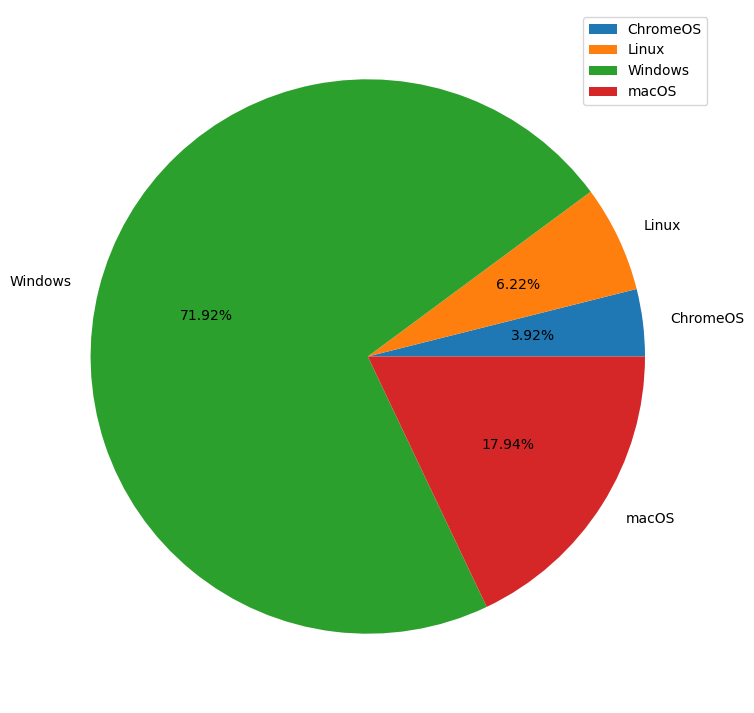

In [49]:
Desktop_filter.plot(
    kind='pie',
    legend=True,
    autopct='%1.2f%%',
    figsize=(12,9)
)

In [50]:
Laptop=df[df.device_type=='Laptop']
Laptop

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
1,Laptop,Samsung,Windows,Intel,4,12,NVIDIA,4,10,64,NVMe,512,1,12,2274.99
4,Laptop,Gigabyte,Linux,AMD,5,16,NVIDIA,5,12,96,NVMe,256,1,12,2681.99
8,Laptop,Dell,Windows,Intel,6,26,NVIDIA,6,16,128,SSD,1024,1,48,2953.99
9,Laptop,Lenovo,Windows,AMD,1,4,NVIDIA,1,4,8,NVMe,512,1,24,1653.99
10,Laptop,HP,Windows,Intel,2,6,NVIDIA,2,6,16,NVMe,1024,1,36,1371.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,Laptop,Acer,Windows,AMD,3,8,AMD,3,8,32,NVMe,512,1,36,1658.99
99995,Laptop,ASUS,Windows,Intel,4,12,AMD,3,8,32,HDD,2048,1,24,1712.99
99996,Laptop,Lenovo,Windows,AMD,2,8,AMD,1,4,8,HDD,1024,1,12,1258.99
99997,Laptop,ASUS,Windows,Intel,2,6,NVIDIA,2,6,16,NVMe,1024,1,12,1686.99


In [51]:
Laptop_filter=Laptop.groupby('os').size()
Laptop_filter

os
ChromeOS     2294
Linux        3613
Windows     42935
macOS       11002
dtype: int64

<Axes: >

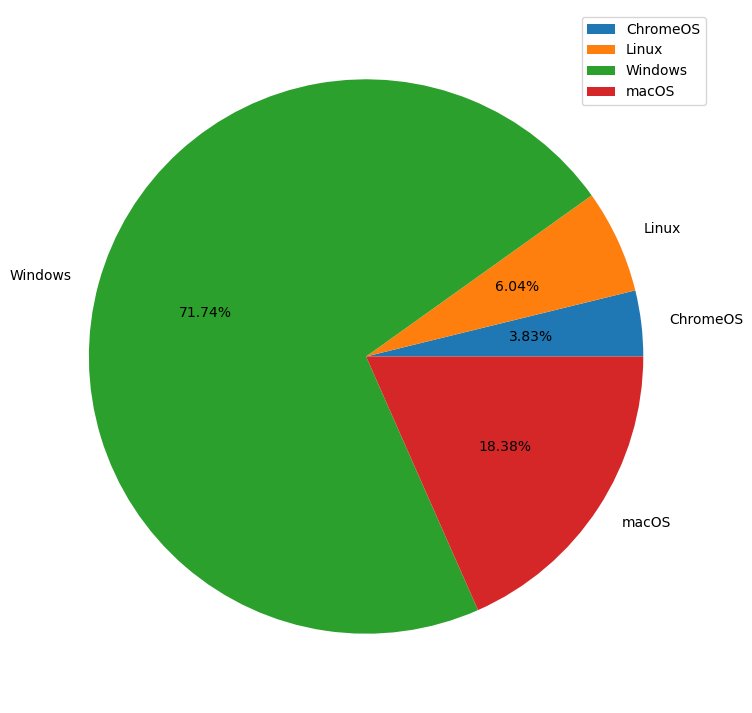

In [52]:
Laptop_filter.plot(
     kind='pie',
    legend=True,
    autopct='%1.2f%%',
    figsize=(12,9)
)

In [53]:
Laptop_brand=Laptop.groupby('brand').size()
Laptop_brand

brand
ASUS        6093
Acer        6044
Apple       7130
Dell        8371
Gigabyte    2875
HP          8362
Lenovo      9507
MSI         4673
Razer       1841
Samsung     4948
dtype: int64

In [54]:
sorted_Laptop_brand=Laptop_brand.sort_values(ascending=True)
sorted_Laptop_brand

brand
Razer       1841
Gigabyte    2875
MSI         4673
Samsung     4948
Acer        6044
ASUS        6093
Apple       7130
HP          8362
Dell        8371
Lenovo      9507
dtype: int64

<Axes: xlabel='brand'>

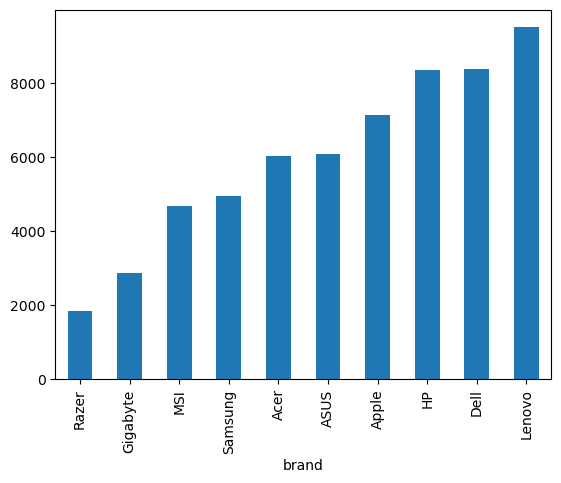

In [55]:
sorted_Laptop_brand.plot(kind='bar')

In [56]:
desktop_brand=Desktop.groupby('brand').size()
desktop_brand

brand
ASUS        4066
Acer        3881
Apple       4785
Dell        5634
Gigabyte    2025
HP          5752
Lenovo      6485
MSI         3218
Razer       1192
Samsung     3118
dtype: int64

In [57]:
sorted_desktop_brand=desktop_brand.sort_values()
sorted_desktop_brand

brand
Razer       1192
Gigabyte    2025
Samsung     3118
MSI         3218
Acer        3881
ASUS        4066
Apple       4785
Dell        5634
HP          5752
Lenovo      6485
dtype: int64

<Axes: xlabel='brand'>

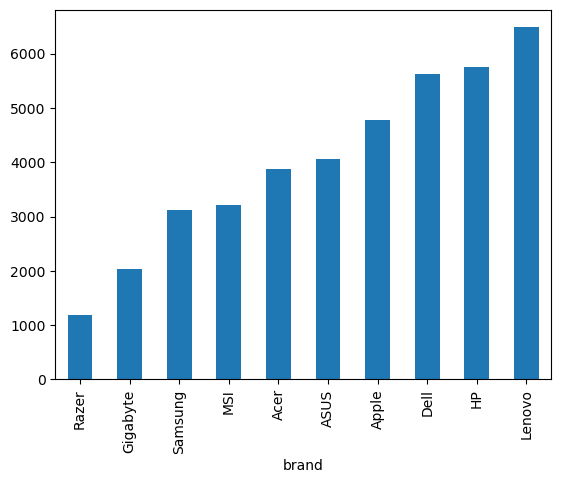

In [58]:
sorted_desktop_brand.plot(kind="bar")

In [72]:
price_per_brand=df.groupby('brand')['price'].mean()
price_per_brand

brand
ASUS        1848.108220
Acer        1760.352015
Apple       2362.295833
Dell        1882.819489
Gigabyte    1866.303878
HP          1857.348722
Lenovo      1865.952356
MSI         1905.564325
Razer       2079.525773
Samsung     1930.390074
Name: price, dtype: float64

<Axes: ylabel='brand'>

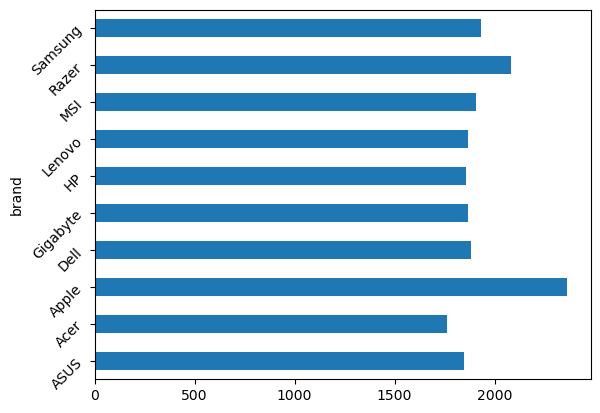

In [74]:
price_per_brand.plot(kind='barh', x='Brand', y='Avg_Price', rot=45)


In [75]:
storage_type=df.groupby('storage_type').size()
storage_type

storage_type
HDD       15023
Hybrid    14981
NVMe      45059
SSD       24937
dtype: int64

<Axes: >

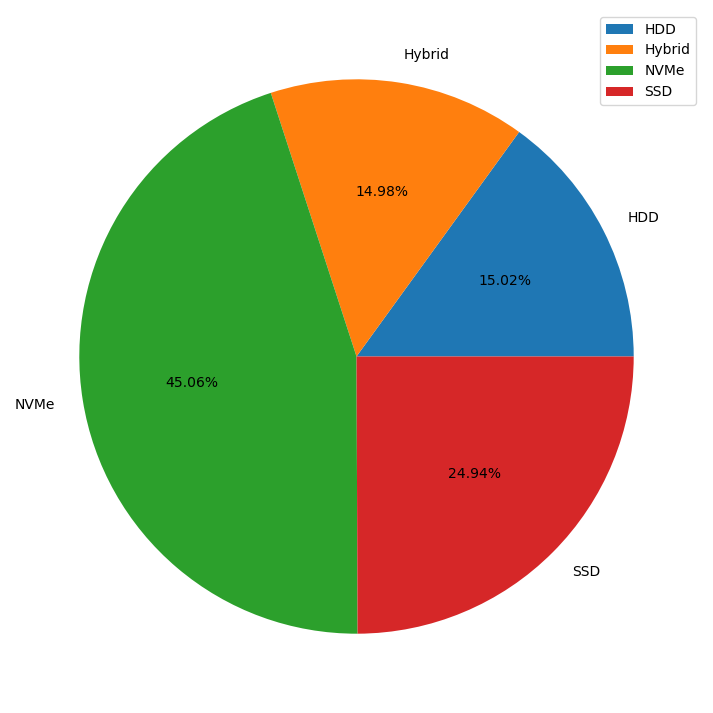

In [77]:
storage_type.plot(kind='pie',legend=True,autopct='%1.2f%%',figsize=(12,9))

In [78]:
Desktop_storage_type=Desktop.groupby('storage_type').size()
Sorted_Desktop_storage_type=Desktop_storage_type.sort_values()
Sorted_Desktop_storage_type

storage_type
Hybrid     5971
HDD        6045
SSD       10057
NVMe      18083
dtype: int64

<Axes: xlabel='storage_type'>

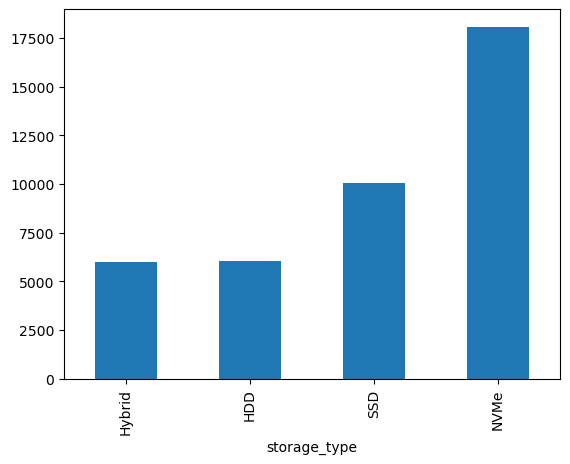

In [79]:
Sorted_Desktop_storage_type.plot(kind='bar')

In [80]:
Laptop_storage_type=Laptop.groupby('storage_type').size()
Sorted_Laptop_storage_type=Laptop_storage_type.sort_values()
Sorted_Laptop_storage_type

storage_type
HDD        8978
Hybrid     9010
SSD       14880
NVMe      26976
dtype: int64

<Axes: >

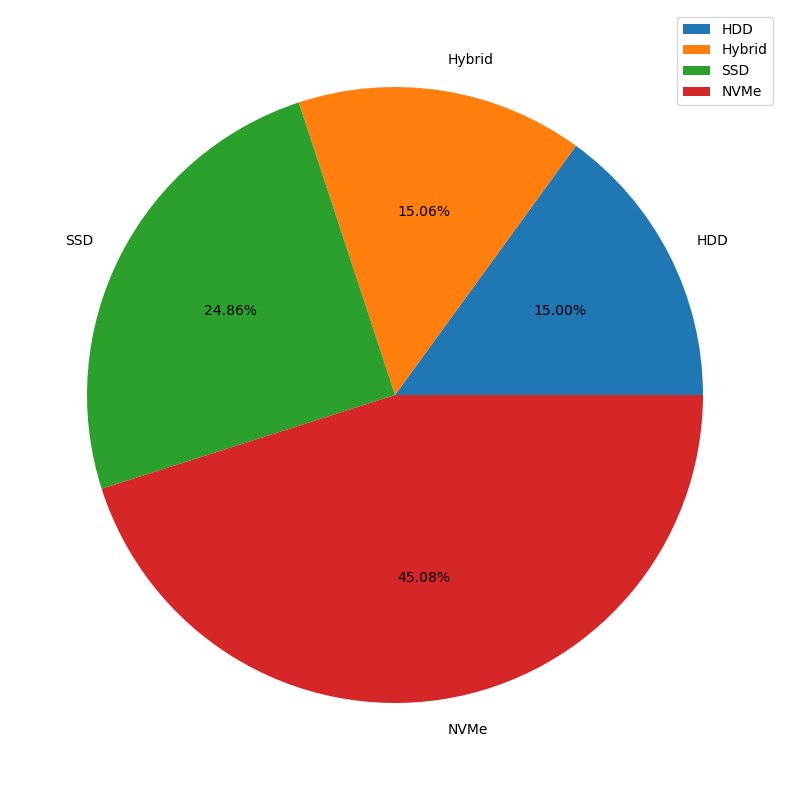

In [81]:
Sorted_Laptop_storage_type.plot(kind='pie',legend=True,autopct='%1.2f%%',figsize=(12,10))

In [93]:
storage_gb=df.groupby('storage_gb').size()
sorted_storage_gb=storage_gb.sort_values()
sorted_storage_gb

storage_gb
4096     2972
2048    11839
256     19816
1024    30137
512     35236
dtype: int64

<Axes: xlabel='storage_gb'>

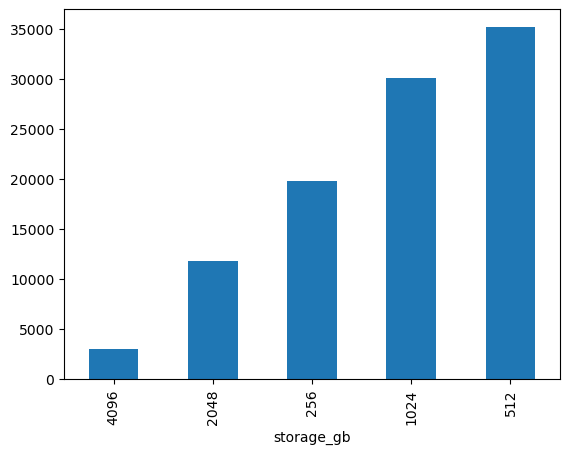

In [94]:
sorted_storage_gb.plot(kind='bar')

In [120]:
unique_storage=df['storage_gb'].unique()
unique_storage

array([1024,  512,  256, 2048, 4096])

In [121]:
storage_gb_1024_G=df[df.storage_gb==1024]
storage_gb_1024_G

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
0,Desktop,Samsung,Windows,Intel,3,12,NVIDIA,2,6,16,NVMe,1024,1,36,1383.99
7,Desktop,Apple,Windows,Apple,3,8,Apple,4,0,32,Hybrid,1024,1,12,2139.99
8,Laptop,Dell,Windows,Intel,6,26,NVIDIA,6,16,128,SSD,1024,1,48,2953.99
10,Laptop,HP,Windows,Intel,2,6,NVIDIA,2,6,16,NVMe,1024,1,36,1371.99
11,Desktop,Samsung,Windows,AMD,2,6,NVIDIA,2,6,16,NVMe,1024,3,36,1366.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,Desktop,Apple,Windows,Apple,4,12,Apple,3,4,32,NVMe,1024,2,24,2121.99
99990,Laptop,Lenovo,Windows,Intel,4,12,Intel,3,0,32,SSD,1024,1,36,2024.99
99994,Desktop,Lenovo,Linux,Intel,3,12,NVIDIA,2,6,16,Hybrid,1024,3,24,1953.99
99996,Laptop,Lenovo,Windows,AMD,2,8,AMD,1,4,8,HDD,1024,1,12,1258.99


In [122]:
storage_gb_1024=storage_gb_1024_G.groupby('brand').size()
storage_gb_1024=storage_gb_1024.sort_values()
storage_gb_1024

brand
Razer        941
Gigabyte    1435
MSI         2358
Samsung     2477
Acer        2941
ASUS        3005
Apple       3611
HP          4240
Dell        4257
Lenovo      4872
dtype: int64

<Axes: xlabel='brand'>

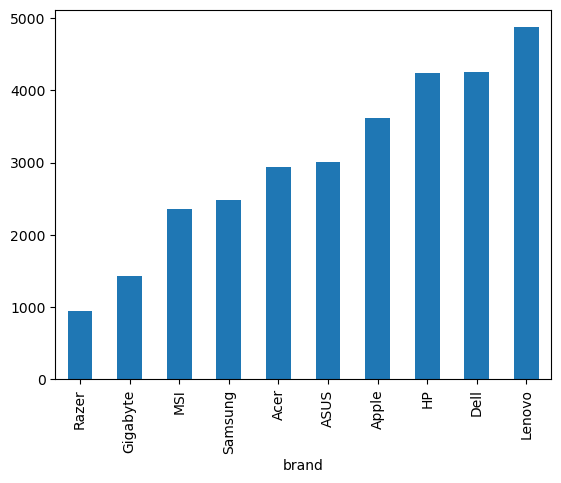

In [127]:
storage_gb_1024.plot(kind='bar')

In [124]:
storage_gb_512_G=df[df.storage_gb==512]
storage_gb_512_G

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
1,Laptop,Samsung,Windows,Intel,4,12,NVIDIA,4,10,64,NVMe,512,1,12,2274.99
2,Desktop,Lenovo,macOS,AMD,2,8,NVIDIA,1,4,8,NVMe,512,2,24,1879.99
3,Desktop,Dell,Windows,AMD,2,6,AMD,2,6,16,HDD,512,2,36,1331.99
5,Desktop,MSI,Windows,Intel,5,16,NVIDIA,6,16,96,NVMe,512,2,36,2751.99
9,Laptop,Lenovo,Windows,AMD,1,4,NVIDIA,1,4,8,NVMe,512,1,24,1653.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,Laptop,Acer,Windows,Intel,1,6,NVIDIA,1,4,8,HDD,512,1,12,1202.99
99988,Desktop,Apple,Windows,Apple,5,16,Apple,4,2,64,SSD,512,3,36,2315.99
99991,Desktop,Lenovo,Windows,AMD,3,12,NVIDIA,3,8,32,Hybrid,512,2,12,1595.99
99992,Desktop,MSI,macOS,Intel,3,8,NVIDIA,3,8,32,SSD,512,2,24,2309.99


In [125]:
storage_gb_512=storage_gb_512_G.groupby('brand').size()
storage_gb_512=storage_gb_512.sort_values()
storage_gb_512

brand
Razer       1068
Gigabyte    1766
Samsung     2806
MSI         2820
ASUS        3530
Acer        3542
Apple       4272
HP          4875
Dell        4970
Lenovo      5587
dtype: int64

<Axes: xlabel='brand'>

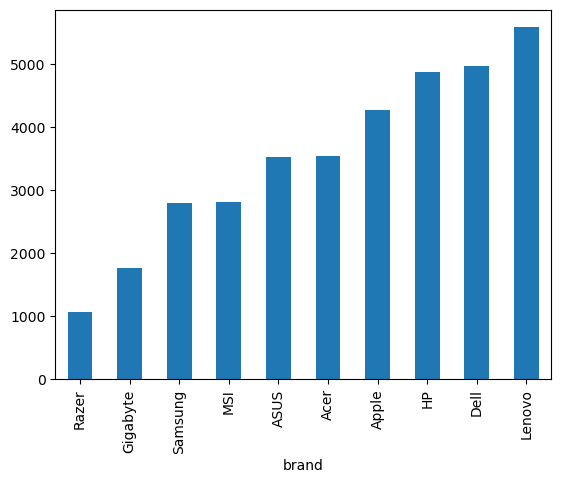

In [128]:
storage_gb_512.plot(kind='bar')

In [129]:
storage_gb_256_G=df[df.storage_gb==256]
storage_gb_256_G

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
4,Laptop,Gigabyte,Linux,AMD,5,16,NVIDIA,5,12,96,NVMe,256,1,12,2681.99
22,Desktop,Apple,Windows,Apple,5,16,Apple,5,0,96,NVMe,256,1,12,2530.99
30,Desktop,HP,Windows,AMD,4,12,NVIDIA,4,10,64,NVMe,256,2,24,1641.99
46,Laptop,MSI,Windows,Intel,6,26,NVIDIA,6,16,128,SSD,256,1,12,3039.99
53,Desktop,Samsung,Windows,Intel,2,6,AMD,2,6,16,NVMe,256,1,24,1200.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,Laptop,Dell,Windows,AMD,3,8,Intel,3,0,32,NVMe,256,2,36,1862.99
99982,Laptop,Acer,Windows,Intel,3,8,NVIDIA,3,8,40,HDD,256,2,12,1442.99
99983,Desktop,Dell,Windows,Intel,2,6,NVIDIA,3,8,16,NVMe,256,1,36,1645.99
99984,Laptop,ASUS,Linux,AMD,6,24,NVIDIA,5,12,96,HDD,256,2,12,2029.99


In [130]:
storage_gb_256=storage_gb_256_G.groupby('brand').size()
storage_gb_256=storage_gb_256.sort_values()
storage_gb_256

brand
Razer        607
Gigabyte     972
MSI         1549
Samsung     1599
Acer        1992
ASUS        2091
Apple       2299
Dell        2760
HP          2791
Lenovo      3156
dtype: int64

<Axes: xlabel='brand'>

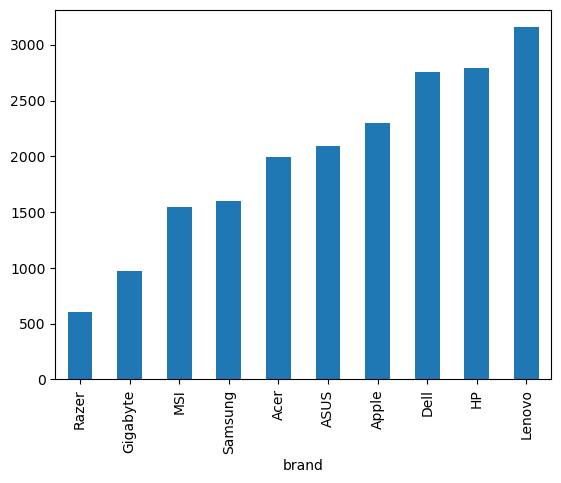

In [131]:
storage_gb_256.plot(kind='bar')

In [132]:
storage_gb_2048_G=df[df.storage_gb==2048]
storage_gb_2048_G

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
6,Desktop,Apple,Windows,Apple,2,6,Apple,1,0,8,Hybrid,2048,2,24,1609.99
26,Laptop,Apple,Linux,Apple,6,26,Apple,6,4,144,NVMe,2048,1,12,3546.99
27,Laptop,Samsung,Windows,Intel,3,10,NVIDIA,4,10,32,SSD,2048,1,24,2386.99
32,Laptop,Samsung,Windows,AMD,3,8,NVIDIA,3,8,40,SSD,2048,1,24,2269.99
36,Laptop,Acer,Windows,AMD,5,18,NVIDIA,4,10,64,NVMe,2048,1,12,2307.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99949,Desktop,ASUS,Windows,AMD,3,12,Intel,3,0,32,Hybrid,2048,2,24,1303.99
99968,Laptop,Apple,Windows,Apple,4,12,Apple,5,6,64,NVMe,2048,1,24,2630.99
99972,Laptop,Dell,Windows,Intel,2,6,NVIDIA,1,4,8,NVMe,2048,1,24,1776.99
99995,Laptop,ASUS,Windows,Intel,4,12,AMD,3,8,32,HDD,2048,1,24,1712.99


In [133]:
storage_gb_2048=storage_gb_2048_G.groupby('brand').size()
storage_gb_2048=storage_gb_2048.sort_values()
storage_gb_2048

brand
Razer        347
Gigabyte     594
MSI          925
Samsung      962
Acer        1146
ASUS        1200
Apple       1370
Dell        1618
HP          1768
Lenovo      1909
dtype: int64

<Axes: xlabel='brand'>

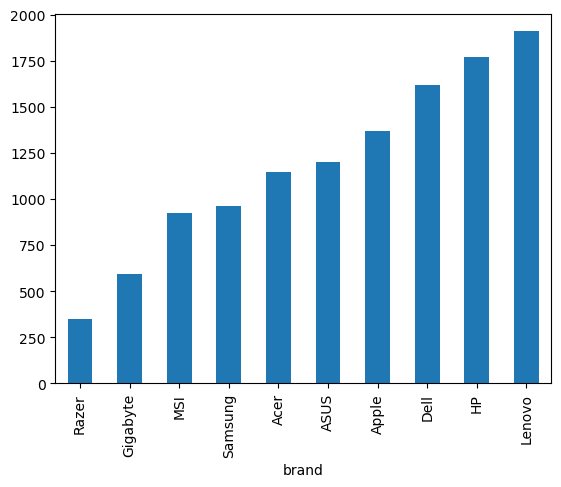

In [134]:
storage_gb_2048.plot(kind='bar')

In [135]:
storage_gb_4096_G=df[df.storage_gb==4096]
storage_gb_4096_G

,device_type,brand,os,cpu_brand,cpu_tier,cpu_cores,gpu_brand,gpu_tier,vram_gb,ram_gb,storage_type,storage_gb,storage_drive_count,warranty_months,price
117,Desktop,MSI,macOS,Intel,2,6,NVIDIA,3,8,16,SSD,4096,2,12,1758.99
155,Desktop,Gigabyte,macOS,AMD,5,18,NVIDIA,4,10,64,SSD,4096,2,12,2829.99
174,Laptop,Dell,Windows,AMD,4,14,AMD,2,6,32,SSD,4096,1,36,1939.99
275,Laptop,Dell,Windows,AMD,1,4,NVIDIA,1,4,8,NVMe,4096,1,24,1692.99
326,Desktop,Acer,Linux,Intel,2,6,NVIDIA,2,6,16,NVMe,4096,2,12,1185.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99544,Laptop,Lenovo,Windows,Intel,3,8,NVIDIA,1,4,16,NVMe,4096,1,12,1412.99
99573,Laptop,Acer,ChromeOS,AMD,3,8,NVIDIA,3,8,40,SSD,4096,1,24,1917.99
99592,Desktop,Lenovo,Windows,AMD,6,24,Intel,6,0,128,SSD,4096,1,24,2373.99
99681,Desktop,Samsung,ChromeOS,Intel,2,8,NVIDIA,1,4,8,Hybrid,4096,1,24,1449.99


In [136]:
storage_gb_4096=storage_gb_4096_G.groupby('brand').size()
storage_gb_4096=storage_gb_4096.sort_values()
storage_gb_4096

brand
Razer        70
Gigabyte    133
Samsung     222
MSI         239
Acer        304
ASUS        333
Apple       363
Dell        400
HP          440
Lenovo      468
dtype: int64

<Axes: xlabel='brand'>

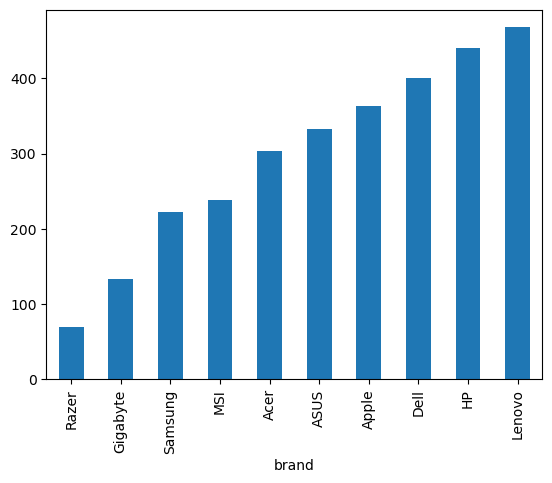

In [137]:
storage_gb_4096.plot(kind='bar')